Data reading and processing complete. Total valid enzyme entries: 36519

Data preview for each group:
          Topt       Tm             Group
0      32.9737  46.3722         Mesophile
1      32.9737  46.3722         Mesophile
17160  42.3190  62.7984       Thermophile
17161  42.3190  62.7984       Thermophile
28664  55.4466  77.2806  Hyperthermophile
28665  55.4466  77.2806  Hyperthermophile


/tmp/ipykernel_604915/2963723162.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[0], data=combined_df, x='Group', y='Topt', order=group_order, palette=palette, inner='box', linewidth=0.75)
/tmp/ipykernel_604915/2963723162.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[1], data=combined_df, x='Group', y='Tm', order=group_order, palette=palette, inner='box', linewidth=0.75)


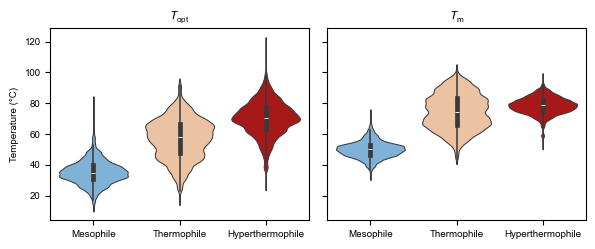

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- 1. Define species groups and data path ---
groups = {
    'Mesophile': ['eco', 'sce', 'bsu'],
    'Thermophile': ['gse', 'tth', 'ate'],
    'Hyperthermophile': ['sai', 'pfu', 'tko']
}

FOLDER_PATH = '/home/wuke/project/bio_deeplearning/zzz_benchmark/KEGG/FinalOutput3'

# --- 2. Read and aggregate data ---
all_data_list = []

# Iterate through each group and its corresponding organisms
for group_name, organisms in groups.items():
    for org_code in organisms:
        file_path = os.path.join(FOLDER_PATH, org_code + '.txt')
        
        # Check if the file exists
        if not os.path.exists(file_path):
            print(f"Warning: File '{file_path}' not found, skipping.")
            continue
            
        try:
            # Read the data, assuming it's tab-separated with no header
            df = pd.read_csv(file_path, sep='\t', header=None)
            
            # Extract the last two columns as Topt and Tm
            # iloc[:, -2] selects the second to last column
            temp_df = df.iloc[:, [-2, -1]].copy()
            temp_df.columns = ['Topt', 'Tm']
            
            # Add group information
            temp_df['Group'] = group_name
            
            all_data_list.append(temp_df)
        except Exception as e:
            print(f"Error processing file '{file_path}': {e}")

# Combine all data into a single DataFrame
if not all_data_list:
    print("Error: No data files were successfully read. Cannot generate the plot.")
else:
    combined_df = pd.concat(all_data_list, ignore_index=True)

    # --- 3. Data cleaning ---
    # Ensure Topt and Tm columns are numeric; non-numeric values become NaN
    combined_df['Topt'] = pd.to_numeric(combined_df['Topt'], errors='coerce')
    combined_df['Tm'] = pd.to_numeric(combined_df['Tm'], errors='coerce')

    # Drop rows with NaN values in Topt or Tm
    combined_df.dropna(subset=['Topt', 'Tm'], inplace=True)

    print(f"Data reading and processing complete. Total valid enzyme entries: {len(combined_df)}")
    print("\nData preview for each group:")
    print(combined_df.groupby('Group').head(2))

    # --- 4. Plotting ---
    
    # Set global plotting style and font for publication quality
    # Ensure the 'Arial' font is installed on your system
    plt.rcParams.update({
        'font.size': 7,
        'font.family': 'Arial',
        'mathtext.fontset': 'custom',
        'mathtext.rm': 'Arial',
        'mathtext.it': 'Arial:italic',
        'mathtext.bf': 'Arial:bold',
        'pdf.fonttype': 42, # Ensures fonts are editable in PDF
        'ps.fonttype': 42
    })

    # Create a figure with 1 row and 2 columns
    # figsize=(6, 2.5) is suitable for a half-column width in a paper
    fig, axes = plt.subplots(1, 2, figsize=(6, 2.5), sharey=True)

    # Define group order and color palette
    group_order = ['Mesophile', 'Thermophile', 'Hyperthermophile']
    palette = {"Mesophile": "#71B4E6", "Thermophile": "#f9c295", "Hyperthermophile": "#BF0001"}

    # --- Plot 1 (Left): Topt distribution ---
    sns.violinplot(ax=axes[0], data=combined_df, x='Group', y='Topt', order=group_order, palette=palette, inner='box', linewidth=0.75)
    axes[0].set_title(r'$\mathit{T}_\mathrm{opt}$')
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Temperature (°C)')

    # --- Plot 2 (Right): Tm distribution ---
    sns.violinplot(ax=axes[1], data=combined_df, x='Group', y='Tm', order=group_order, palette=palette, inner='box', linewidth=0.75)
    axes[1].set_title(r'$\mathit{T}_\mathrm{m}$')
    axes[1].set_xlabel('')
    axes[1].set_ylabel('') # Y-axis label is shared, so it's blank here

    # Set the font size for all tick labels
    for ax in axes:
        ax.tick_params(axis='both', which='major', labelsize=7)
    
    # Adjust layout to prevent labels from overlapping
    plt.tight_layout()
    
    # Save the figure in PDF format for high quality
    # Ensure the 'pdf' directory exists or remove it
    # For example: plt.savefig("fig5B.pdf", dpi=600)
    plt.savefig("pdf/fig5B.pdf", dpi=600)
    
    plt.show()